In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

import oscars.sr
import oscars.plots_mpl as plots
import oscars.field_opt as field

OSCARS v2.0.2 - Open Source Code for Advanced Radiation Simulation
Brookhaven National Laboratory, Upton NY, USA
http://oscars.bnl.gov
oscars@bnl.gov


In [2]:
osr = oscars.sr.sr()

In [3]:
# Add an undulator B-field
osr.add_bfield_undulator([0, 0.5, 0], [0, 0, 0.1], 20)
# Add a smudge in the field
osr.add_bfield_gaussian(bfield=[0, 0.00001, 0], sigma=[0, 0.0005, 0], translation=[0, 0, -0.25])

In [4]:
# Record some info about terminating magnets
b_field = 0.500 # Max undulator field
t_distance = 1.2 # Distance from origin to terminating magnets
t_width = 0.3 # Width of terminating magnets
t_field = 0.5 # Max terminating field
sr_info = [b_field, t_distance, t_width, t_field]

In [5]:
# Set particle beam and start/stop times
osr.clear_particle_beams()
osr.set_particle_beam(type='electron', name='test-beam', 
                      x0=[0, 0, -5], d0=[0, 0, 1], t0=-5,
                      energy_GeV=3, current = 0.500)
osr.set_ctstartstop(-5,5)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.7527545199910053e-07
            Iterations: 20
            Function evaluations: 160
            Gradient evaluations: 20

Solution array: [ -6.23753495e-08  -1.66670867e-04   5.78491723e-08  -1.66658690e-04]


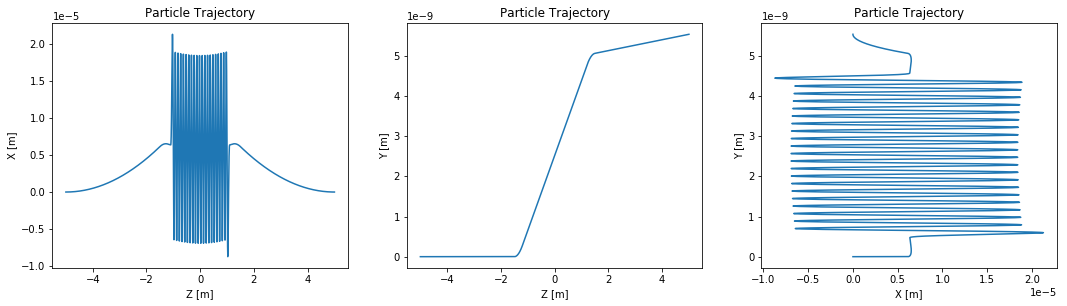

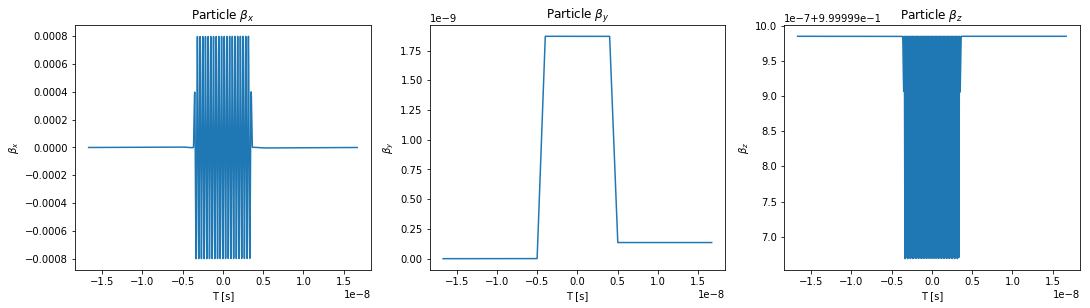

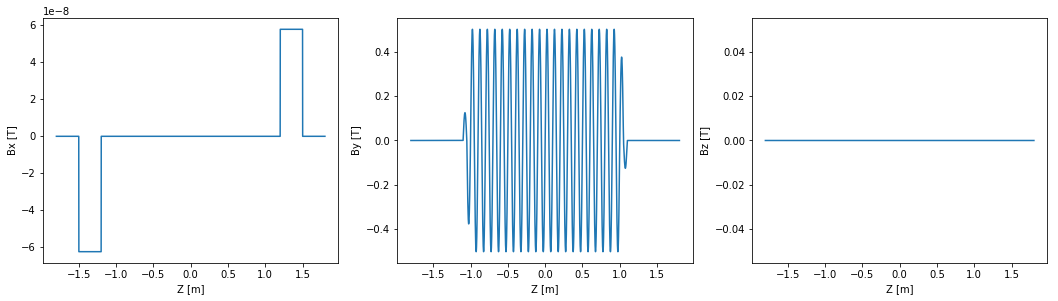

In [6]:
# Optimize field
t = field.b_y(osr, sr_info)